# Support Vector Machines (SVM)

Classification and Regression Algorithm

Uses the idea of Line of Best Fit but adds margins called HyperPlanes to better separate data

Today's focus is more on tuning than it is on this particular Algorithm

###### Pros

Effective when the number of features is greater than the number of samples

High degree of tuning parameters and customization

###### Cons

Role of Kernel selection plays a big role in performance

Incredibly complicated to understand without a high degree of mathematics background

High degree of tuning parameters and customization

Not great for beginner learning concepts


### Getting Started

Regression Test Set (Housing Data Set)

https://www.kaggle.com/datasets/vedavyasv/usa-housing

Classification Test Set (Titanic Data Set)

https://www.kaggle.com/datasets/brendan45774/test-file

### Clean,Prepare, Train-Test-Split, Fit, Predict, Evaluate

`
X = df['Attributes']
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
`

Regression

`
model = SVR()
model.fit(X_train, y_train)
pred_model = model.predict(X_test)
`

`
print('Score', model.score(X_test, y_test))
print('RMSE', np.sqrt(mean_squared_error(X_test, y_test)))
`

Classification

`
model = SVR()
model.fit(X_train, y_train)
pred_model = model.predict(X_test)
`

`
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
`


### Tuning Parameters
This is where the fun starts!

Before we get into this it's good to go over a few terms


###### SVC Specific Parameters

Example Tuning parameters to normalize data

`C` controls the cost of the mis-classification (how specific our areas of classification are)

- Large C Value
 - High penalty
 - low bias / high variance

- Low C 
 - Less penalty
 - High bias / Low variance


Gamma/Epsilon controls the quality of fitting the data

- Epsilon value is for Regression Algorithms
- Gamma values are for both Regression and Classification

- Small Gamma/Epsilon value
 - Larger area is covered with a large degree of variance
 - Low Bias / High Variance

- High Gamma/Epsilon Value
 - Smaller areas that are covered but more regional in nature and higher Bias
 - High bias / Low variance


<div>
<br>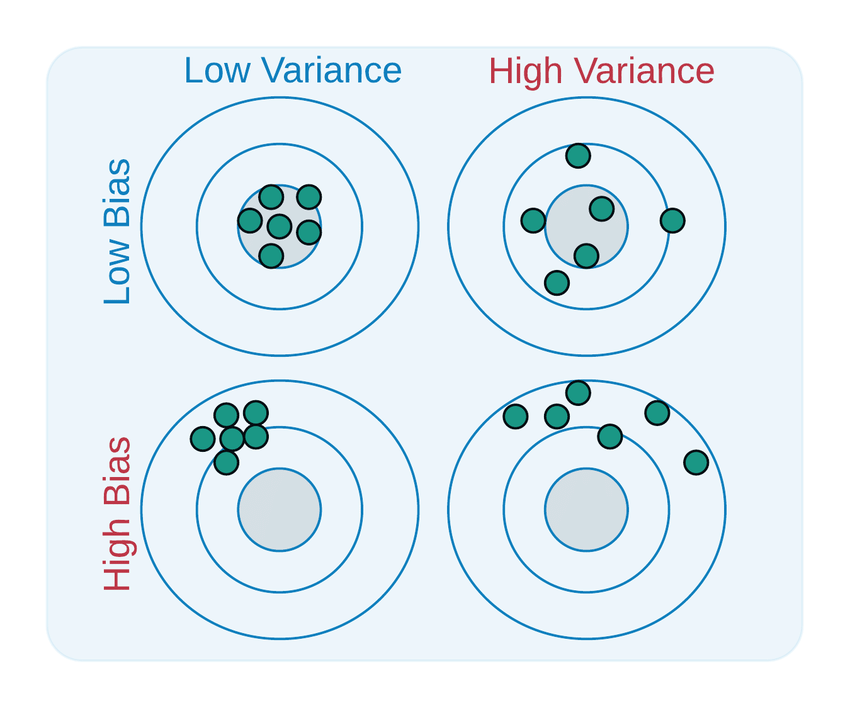
</div>


Further Reading
https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769#:~:text=gamma,.fit(X%2C%20y)

Kernel RBF and Kernel Trick
https://en.wikipedia.org/wiki/Radial_basis_function_kernel

https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick

###### Finding the Right Tuning Parameters

Introduce GridSearchCV

GridSearchCV runs through a matrix of provided `param` values to produce the combination with the best results for each specific Model

SVC Model

`
from sklearn.model_selection import GridSearchCV
params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001]}
model = GridSearchCV(SVC(), params, verbose=3)
model.fit(X_train, y_train)
model.best_params_
`

`
model_predict = model.predict(X_test)
print(classification_report(y_test, model_predict))
print(confusion_matrix(y_test, model_predict))
`


### Graphing Prediction vs Test Data

Asessing our data visually

ROC Curve and Elbow Curve

`
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, grid_predict)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Title')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
`

Good Results - Large area between line of best fit and prediction
Almost 100% accuracy
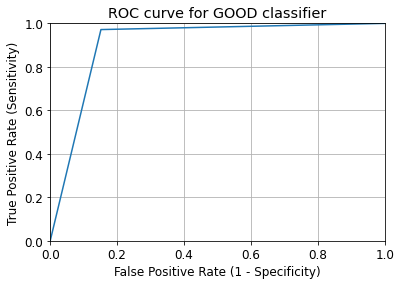


Poor Results - Not a whole lot of area - ~50%
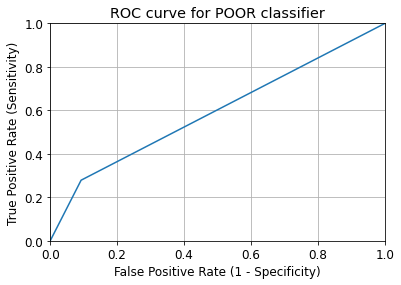



In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



### Support Vector Regression

In [41]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [43]:
# Train test split

X = df[df.columns[:-2]]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
# Let's instantiate our SVR model

model = SVR()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('MAE', mean_absolute_error(y_test, predictions))
print('MSE', mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(mean_squared_error(y_test, predictions)))
print('Score', model.score(X_test, y_test))

MAE 273295.56484484207
MSE 118178383784.76591
RMSE 343770.8303285285
Score -0.001424109661367856


In [45]:
# Let's tune parameters manually

model = SVR(C = 1000, epsilon=0.01)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('MAE', mean_absolute_error(y_test, predictions))
print('MSE', mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(mean_squared_error(y_test, predictions)))
print('Score', model.score(X_test, y_test))

MAE 230839.6907431606
MSE 83911597411.64069
RMSE 289674.98582314746
Score 0.28894697966712546


In [46]:
# Let's implement GridSearchCV to iterate through all the parameters

grid = GridSearchCV(SVR(), param_grid={'C':[1,1000,100000], 'epsilon':[0.1, 0.001, 0.0001]}, verbose=3 )

grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print('MAE', mean_absolute_error(y_test, predictions))
print('MSE', mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(mean_squared_error(y_test, predictions)))
print('Score', grid.score(X_test, y_test))



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .................C=1, epsilon=0.1;, score=-0.002 total time=   0.6s
[CV 2/5] END ..................C=1, epsilon=0.1;, score=0.000 total time=   0.6s
[CV 3/5] END .................C=1, epsilon=0.1;, score=-0.000 total time=   0.6s
[CV 4/5] END ..................C=1, epsilon=0.1;, score=0.000 total time=   0.6s
[CV 5/5] END ..................C=1, epsilon=0.1;, score=0.000 total time=   0.6s
[CV 1/5] END ...............C=1, epsilon=0.001;, score=-0.002 total time=   0.6s
[CV 2/5] END ................C=1, epsilon=0.001;, score=0.000 total time=   0.6s
[CV 3/5] END ...............C=1, epsilon=0.001;, score=-0.000 total time=   0.6s
[CV 4/5] END ................C=1, epsilon=0.001;, score=0.000 total time=   0.7s
[CV 5/5] END ................C=1, epsilon=0.001;, score=0.000 total time=   0.6s
[CV 1/5] END ..............C=1, epsilon=0.0001;, score=-0.002 total time=   0.6s
[CV 2/5] END ...............C=1, epsilon=0.0001;,

In [47]:
grid.best_params_

{'C': 100000, 'epsilon': 0.0001}

In [49]:
# Now what if we want to include a pipline in this ex Standard Scale the Data?


pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svr', SVR()),
], verbose=True)

param_grid = {
    'svr__C':[1,1000,100000],
    'svr__epsilon' :[0.1, 0.001, 0.0001]
}


grid = GridSearchCV(pipe, param_grid=param_grid, verbose=3 )

grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print('MAE', mean_absolute_error(y_test, predictions))
print('MSE', mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(mean_squared_error(y_test, predictions)))
print('Score', grid.score(X_test, y_test))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.4s
[CV 1/5] END .......svr__C=1, svr__epsilon=0.1;, score=-0.002 total time=   0.6s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.4s
[CV 2/5] END ........svr__C=1, svr__epsilon=0.1;, score=0.001 total time=   0.6s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.4s
[CV 3/5] END .......svr__C=1, svr__epsilon=0.1;, score=-0.000 total time=   0.6s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.4s
[CV 4/5] END ........svr__C=1, svr__epsilon=0.1;, score=0.001 total time=   0.6s
[Pipeline] ................ (step 1 of 2) Proces

[CV 2/5] END .svr__C=100000, svr__epsilon=0.001;, score=0.895 total time=   0.6s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.4s
[CV 3/5] END .svr__C=100000, svr__epsilon=0.001;, score=0.893 total time=   0.7s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.4s
[CV 4/5] END .svr__C=100000, svr__epsilon=0.001;, score=0.901 total time=   0.7s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.4s
[CV 5/5] END .svr__C=100000, svr__epsilon=0.001;, score=0.909 total time=   0.7s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.4s
[CV 1/5] END svr__C=100000, svr__epsilon=0.0001;, score=0.904 total time=   0.7s
[Pipeline] ................

### Support Vector Classification

In [50]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
def fill_in_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if np.isnan(age):
        if pclass == 1:
            return 41
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
df['Age'] = df[['Age', 'Pclass']].apply(fill_in_age, axis=1)

# Embarked and Pclass split

emb = pd.get_dummies(df['Embarked'], drop_first=True)
pclass = pd.get_dummies(df['Pclass'], drop_first=True)
pclass = pclass.rename({2:'P2', 3:'P3'}, axis=1)

df = pd.concat([df, emb, pclass], axis=1)

# Drop the unnecessary columns
df = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Age       417 non-null    float64
 2   SibSp     417 non-null    int64  
 3   Parch     417 non-null    int64  
 4   Fare      417 non-null    float64
 5   Q         417 non-null    uint8  
 6   S         417 non-null    uint8  
 7   P2        417 non-null    uint8  
 8   P3        417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 21.2 KB


In [52]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,P2,P3
0,0,34.5,0,0,7.8292,1,0,0,1
1,1,47.0,1,0,7.0000,0,1,0,1
2,0,62.0,0,0,9.6875,1,0,1,0
3,0,27.0,0,0,8.6625,0,1,0,1
4,1,22.0,1,1,12.2875,0,1,0,1


In [54]:
# Train Test Split

X = df[df.columns[1:]]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
# Lets do a pipline with SVC and Standard Scalar
# and then toss it into a Grid Search with
# C params of 1000, 100000 and gamma values auto and scale


pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC())
], verbose=True)


param_grid = {
    'svc__C':[1,1000,100000],
    'svc__gamma':['auto','scale']
}

grid = GridSearchCV(pipe, param_grid=param_grid, verbose=3)

grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s
[CV 1/5] END .........svc__C=1, svc__gamma=auto;, score=0.695 total time=   0.0s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s
[CV 2/5] END .........svc__C=1, svc__gamma=auto;, score=0.724 total time=   0.0s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s
[CV 3/5] END .........svc__C=1, svc__gamma=auto;, score=0.707 total time=   0.0s
[Pipeline] ................ (step 1 of 2) Processing sc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s
[CV 4/5] END .........svc__C=1, svc__gamma=auto;, score=0.586 total time=   0.0s
[Pipeline] ................ (step 1 of 2) Proces

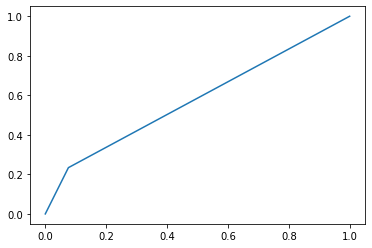

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)